In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [26]:
def bayesian_update(theta, prior, likelihood):
    fig = plt.figure(figsize=(9, 3))
    fig.subplots_adjust(bottom=0.15)
    posterior = prior * likelihood
    _iter = ((prior, "Prior"), (likelihood, "likelihood"), (posterior, "Posterior"))
    for i, (dist, dist_name) in enumerate(_iter, 1):
        ax = fig.add_subplot(1, 3, i, xlabel=r"$\theta$", title=dist_name,
                             ylabel='density' if i == 1 else '')
        ax.fill_between(theta, dist)
    return fig

def save(fig, name):
    for ext in ['.svg', '.png', '.pdf']:
        fig.savefig(name + ext)

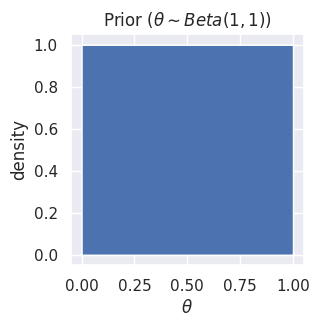

In [46]:
# prior

theta = np.linspace(0, 1, 1000)
prior = sp.stats.beta(1, 1).pdf(theta)

fig = plt.figure(figsize=(3, 3))
# fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, xlabel=r"$\theta$", title=r"Prior ($\theta \sim Beta(1,1)$)", ylabel='density')
ax.fill_between(theta, prior)
save(fig, "figures/bayesian_updating/prior")
fig

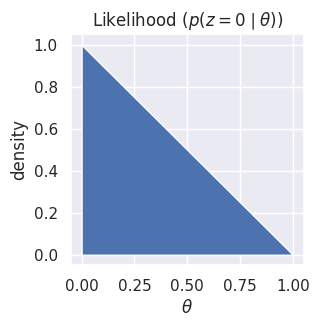

In [59]:
# prior

theta = np.linspace(0, 1, 1000)
miss = sp.stats.bernoulli.pmf(0, theta)
hit = sp.stats.bernoulli.pmf(1, theta)

fig = plt.figure(figsize=(3, 3))
# fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, xlabel=r"$\theta$", title=r"Likelihood ($p(z=0\mid\theta)$)", ylabel='density')
ax.fill_between(theta, miss)
save(fig, "figures/bayesian_updating/likelihood")
fig

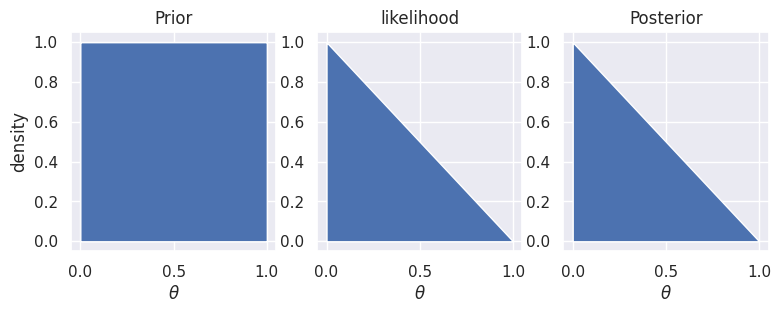

In [50]:
# update1

prior = sp.stats.beta(1, 1).pdf(theta)
likelihood = miss
fig = bayesian_update(theta, prior, likelihood)
save(fig, 'figures/bayesian_updating/update1')
fig


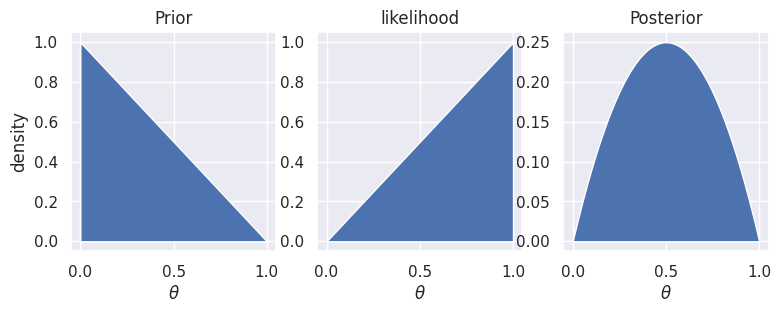

In [51]:
# update2

prior = prior * miss
likelihood = hit
fig = bayesian_update(theta, prior, likelihood)
save(fig, 'figures/bayesian_updating/update2')
fig

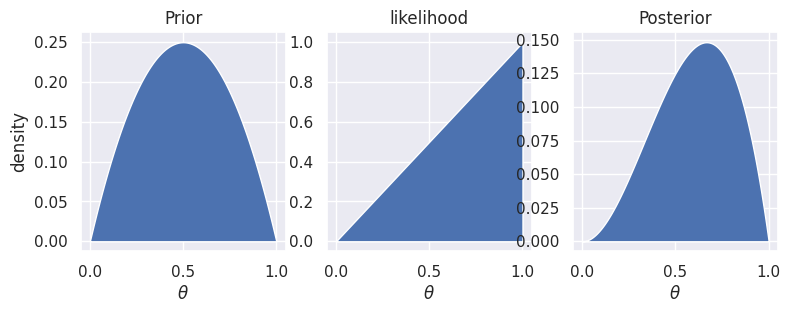

In [52]:
# update3

prior = prior * hit
likelihood = hit
fig = bayesian_update(theta, prior, likelihood)
save(fig, 'figures/bayesian_updating/update3')
fig

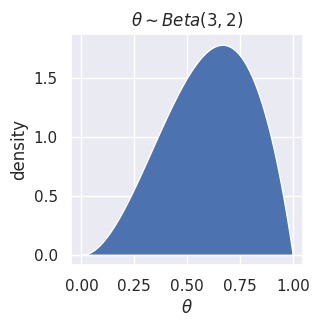

In [58]:
# prior

posterior = sp.stats.beta(3, 2).pdf(theta)

fig = plt.figure(figsize=(3, 3))
# fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, xlabel=r"$\theta$", title=r"$\theta \sim Beta(3, 2)$", ylabel='density')
ax.fill_between(theta, posterior)
save(fig, "figures/bayesian_updating/beta_posterior")
fig